In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
path = r"/Users/omi/Library/Containers/com.microsoft.Excel/Data/Downloads/student_scores.csv"
df = pd.read_csv(path)

In [60]:
df.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [61]:
df.tail()

Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [62]:
df.shape

(25, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

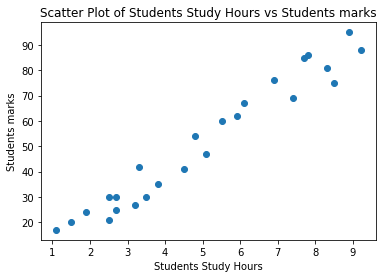

In [65]:
plt.scatter(x =df.Hours, y = df.Scores)	
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [66]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [67]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [68]:
X = df.drop("Scores", axis = "columns")
Y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of Y = ", Y.shape)

shape of X =  (25, 1)
shape of Y =  (25, 1)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of Y_train = ", Y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of Y_test = ", Y_test.shape)

shape of X_train =  (20, 1)
shape of Y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of Y_test =  (5, 1)


In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [71]:
lr.fit(X_train,Y_train)

LinearRegression()

In [72]:
lr.coef_

array([[9.56433743]])

In [73]:
lr.intercept_

array([2.70197068])

In [74]:
lr.predict([[4]])[0][0].round(2)

40.96

In [75]:
Y_pred = lr.predict(X_test)
Y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [76]:
pd.DataFrame(np.c_[X_test, Y_test, Y_pred], columns = ["study_hours", "student_mark_original","student_marks_predicted"])

study_hours  student_mark_original  student_marks_predicted
0          5.5                   60.0                55.305827
1          7.7                   85.0                76.347369
2          6.9                   76.0                68.695899
3          8.3                   81.0                82.085971
4          2.7                   30.0                28.525682

In [77]:
lr.score(X_test,Y_test)

0.9238518102278777

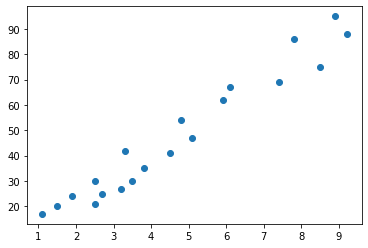

In [78]:
plt.scatter(X_train,Y_train)

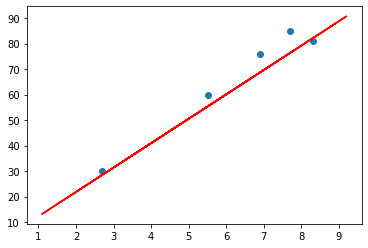

In [79]:
plt.scatter(X_test,Y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [80]:
import joblib
joblib.dump(lr, "Student_Score_Predictor_model.pkl")

['Student_Score_Predictor_model.pkl']

In [81]:
model = joblib.load("Student_Score_Predictor_model.pkl")

In [82]:
model.predict([[5]])[0][0]

50.52365785611766